In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Wczytanie wideo
video_path = '100_LAT_AGH.mp4'
cap = cv2.VideoCapture(video_path)

# Sprawdzenie, czy wideo zostało poprawnie otwarte
if not cap.isOpened():
    print("Nie można otworzyć pliku wideo")
    exit()

# Inicjalizacja listy na klatki i różnice
frames = []
differences = []

# Czytanie klatek
ret, frame1 = cap.read()
frame1_gray = cv2.cvtColor(frame1, cv2.COLOR_BGR2GRAY)
frame_index = 1

while True:
    ret, frame2 = cap.read()
    if not ret:
        break
    
    frame2_gray = cv2.cvtColor(frame2, cv2.COLOR_BGR2GRAY)
    
    # Obliczanie różnicy między kolejnymi klatkami
    difference = np.abs(frame2_gray.astype(np.int16) - frame1_gray.astype(np.int16))
    mean_difference = np.mean(difference)
    
    frames.append((frame_index, frame1_gray, frame2_gray, difference))
    differences.append(mean_difference)
    
    frame1_gray = frame2_gray
    frame_index += 1

cap.release()

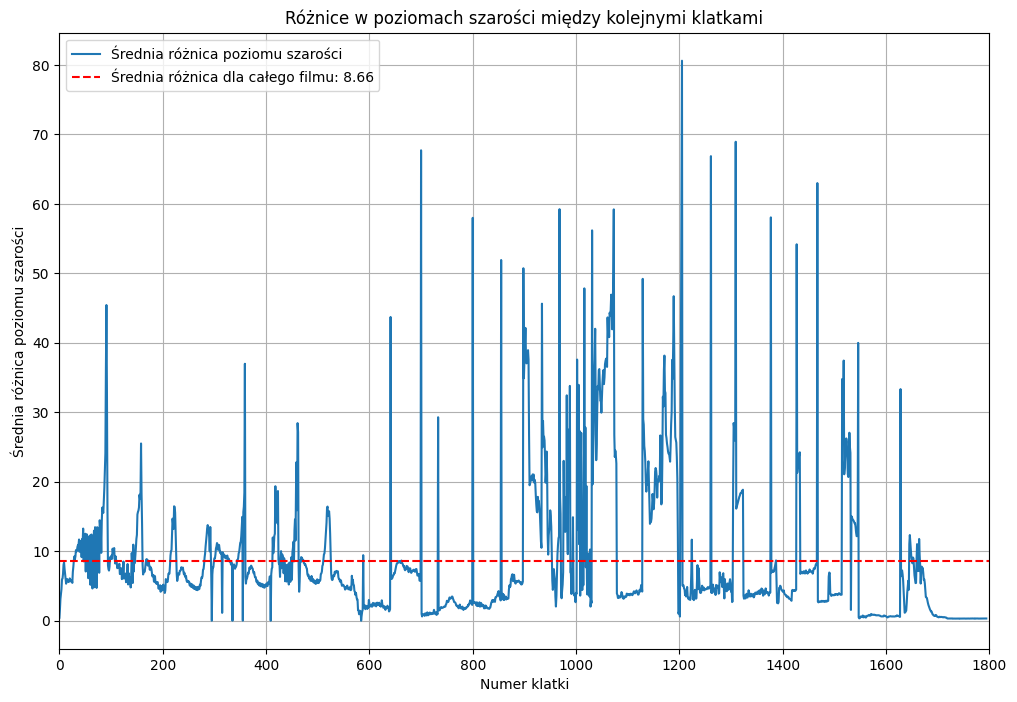

In [25]:
average_difference = np.mean(differences)
# Wykres różnic
fig, axes = plt.subplots(figsize = [12, 8])
axes.plot(differences, label='Średnia różnica poziomu szarości')
axes.axhline(y=average_difference, color='r', linestyle='--', label=f'Średnia różnica dla całego filmu: {average_difference:.2f}')
axes.set_xlabel('Numer klatki')
axes.set_ylabel('Średnia różnica poziomu szarości')
axes.set_title('Różnice w poziomach szarości między kolejnymi klatkami')
axes.set_xlim(0, 1800)
axes.grid()
axes.legend()
fig.savefig('Wykres_różnic.jpg')

In [34]:
# Znajdowanie 5 największych różnic
top_5_differences = sorted(enumerate(differences), key=lambda x: x[1], reverse=True)[:10]

# Wypisanie par klatek z największymi różnicami
for index, value in top_5_differences:
    print(f'Klatka {index+1} i klatka {index+2} mają różnicę: {value}')

Klatka 1206 i klatka 1207 mają różnicę: 80.61907455632716
Klatka 1310 i klatka 1311 mają różnicę: 68.95262876157408
Klatka 701 i klatka 702 mają różnicę: 67.72344859182098
Klatka 1262 i klatka 1263 mają różnicę: 66.87950906635803
Klatka 1468 i klatka 1469 mają różnicę: 63.00273775077161
Klatka 1205 i klatka 1206 mają różnicę: 61.120153838734566
Klatka 969 i klatka 970 mają różnicę: 59.24550588348765
Klatka 1074 i klatka 1075 mają różnicę: 59.219353780864196
Klatka 1378 i klatka 1379 mają różnicę: 58.06532696759259
Klatka 801 i klatka 802 mają różnicę: 58.0011824845679


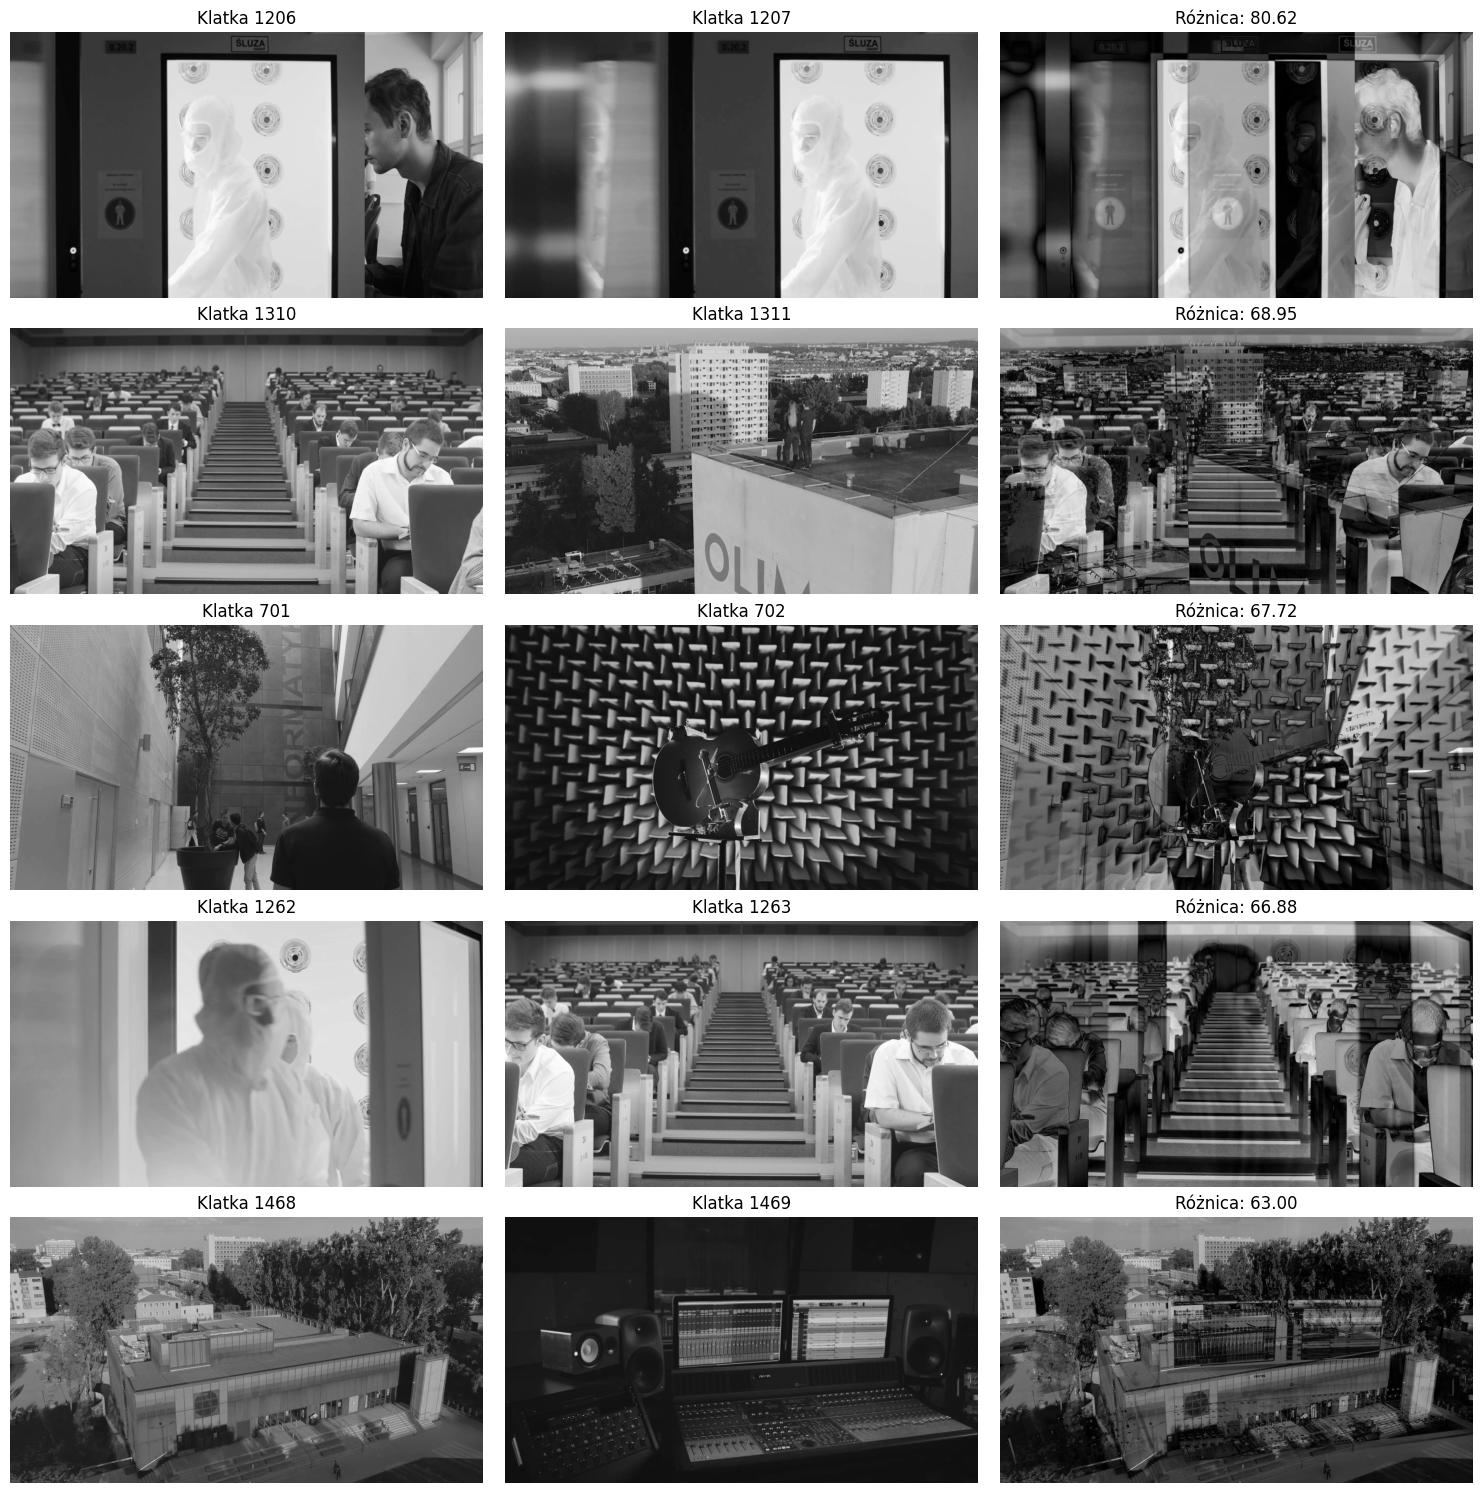

In [30]:
# Znajdowanie 5 największych różnic
top_5_differences = sorted(enumerate(frames), key=lambda x: differences[x[0]], reverse=True)[:5]

# Wyświetlanie par klatek z największymi różnicami
fig, axs = plt.subplots(5, 3, figsize = [15, 15])

for i, (index, (frame_num, frame1, frame2, diff)) in enumerate(top_5_differences):
    axs[i, 0].imshow(frame1, cmap='gray')
    axs[i, 0].set_title(f'Klatka {frame_num}')
    axs[i, 0].axis('off')
    
    axs[i, 1].imshow(frame2, cmap='gray')
    axs[i, 1].set_title(f'Klatka {frame_num + 1}')
    axs[i, 1].axis('off')
    
    axs[i, 2].imshow(diff, cmap='gray')
    axs[i, 2].set_title(f'Różnica: {differences[index]:.2f}')
    axs[i, 2].axis('off')

plt.tight_layout()
fig.savefig('Różnice_01.jpg')

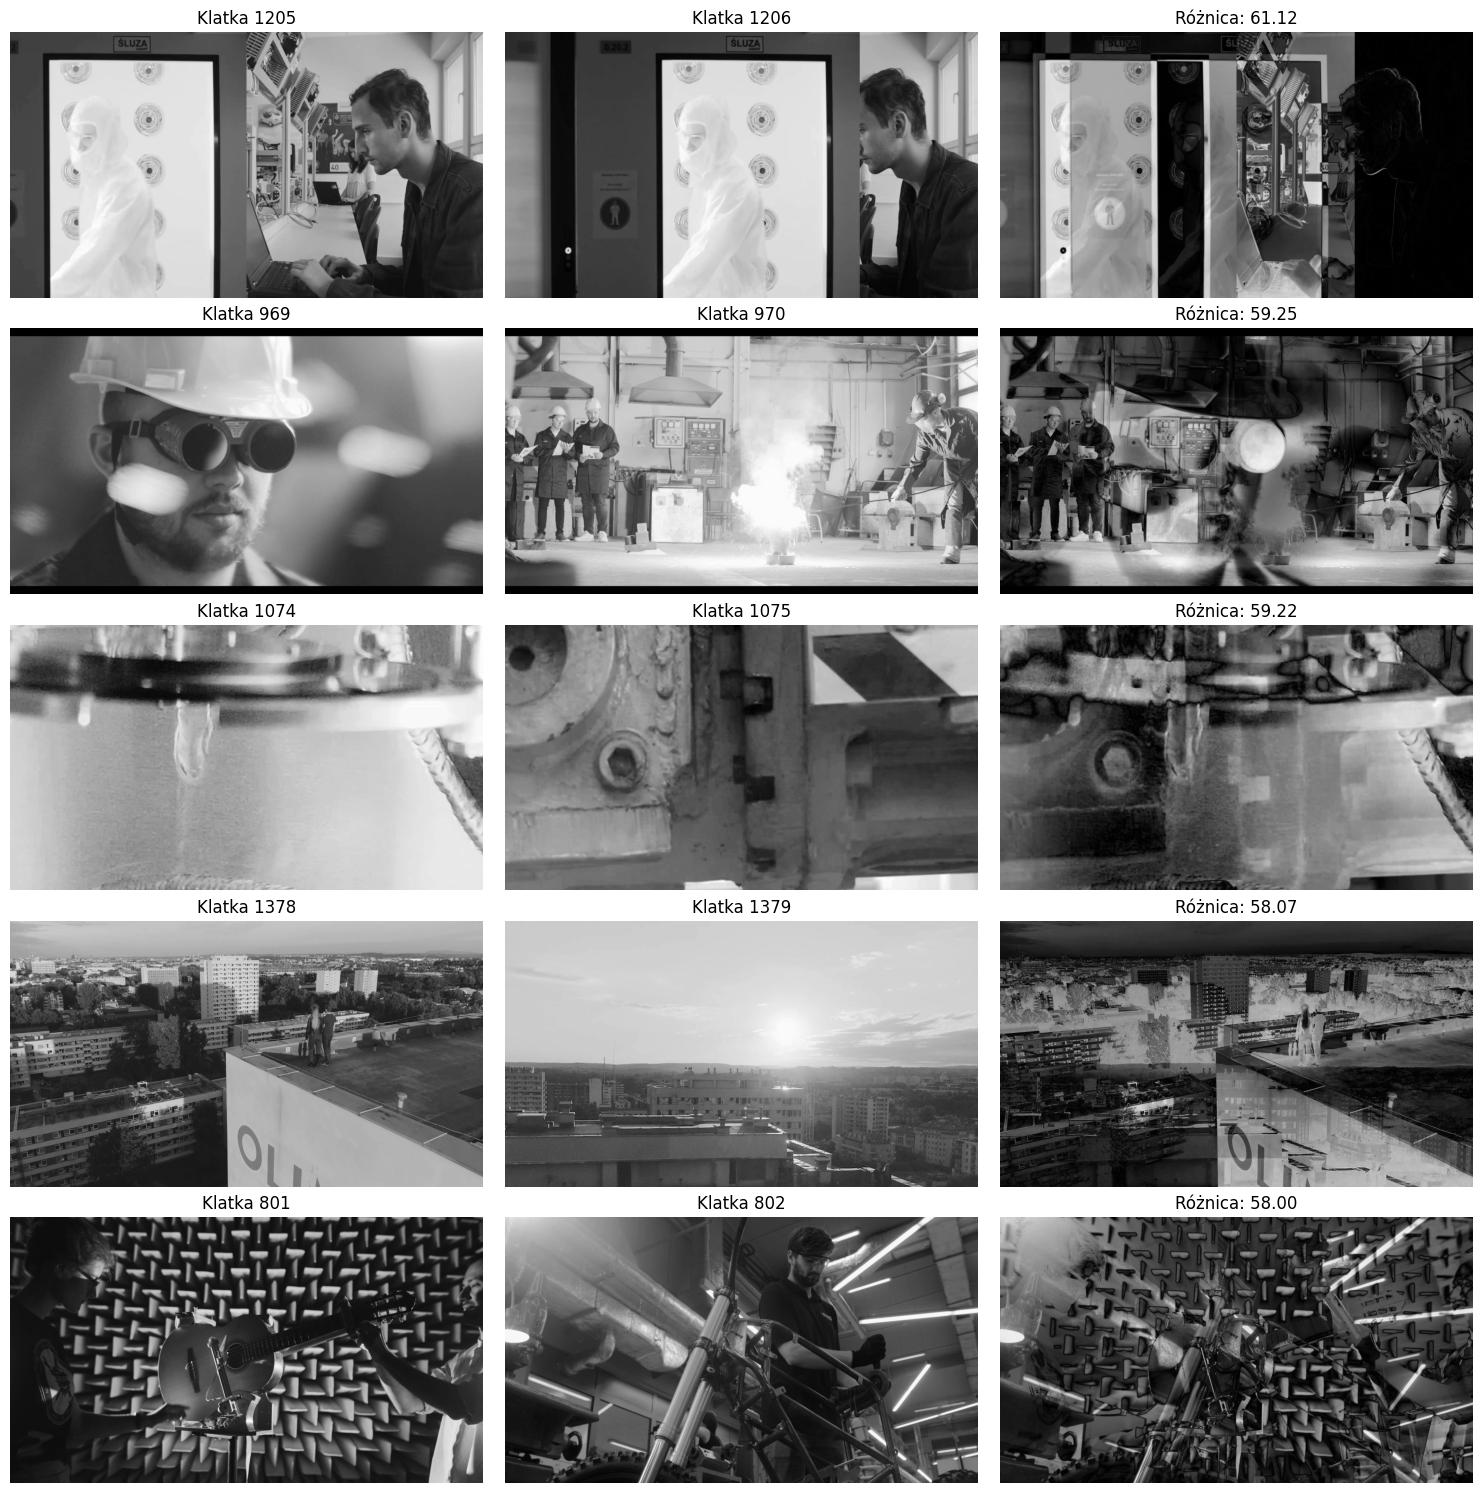

In [32]:
second_5_differences = sorted(enumerate(frames), key=lambda x: differences[x[0]], reverse=True)[5:10]

# Wyświetlanie par klatek z największymi różnicami
fig, axs = plt.subplots(5, 3, figsize = [15, 15])

for i, (index, (frame_num, frame1, frame2, diff)) in enumerate(second_5_differences):
    axs[i, 0].imshow(frame1, cmap='gray')
    axs[i, 0].set_title(f'Klatka {frame_num}')
    axs[i, 0].axis('off')
    
    axs[i, 1].imshow(frame2, cmap='gray')
    axs[i, 1].set_title(f'Klatka {frame_num + 1}')
    axs[i, 1].axis('off')
    
    axs[i, 2].imshow(diff, cmap='gray')
    axs[i, 2].set_title(f'Różnica: {differences[index]:.2f}')
    axs[i, 2].axis('off')

plt.tight_layout()
fig.savefig('Różnice_02.jpg')